In [4]:
import pandas as pd
import os
from result_verification import load_data, get_vreg

In [5]:
di = load_data([os.path.join('data', file) for file in os.listdir('data')])
di

{'plota_logo.csv [40]': {'Setpoint': 40,
  'data': 0     31
  1     29
  2     35
  3     34
  4     35
        ..
  88    51
  89    50
  90    49
  91    49
  92    49
  Name: Output, Length: 93, dtype: int64},
 'plota_logo.csv [60]': {'Setpoint': 60,
  'data': 0     53
  1     57
  2     57
  3     59
  4     59
        ..
  90    65
  91    65
  92    64
  93    64
  94    64
  Name: Output, Length: 95, dtype: int64},
 'plota_logo.csv [80]': {'Setpoint': 80,
  'data': 0     68
  1     71
  2     71
  3     76
  4     73
        ..
  82    81
  83    80
  84    80
  85    80
  86    80
  Name: Output, Length: 87, dtype: int64},
 'plota_logo.csv [117]': {'Setpoint': 117,
  'data': 0      89
  1      91
  2      95
  3      99
  4     100
       ... 
  65    121
  66    117
  67    118
  68    118
  69    118
  Name: Output, Length: 70, dtype: int64},
 'plota_logo.csv [134]': {'Setpoint': 134,
  'data': 0     122
  1     124
  2     128
  3     130
  4     128
       ... 
  58    134


In [6]:
import matplotlib.pyplot as plt

46.365591397849464
plota_logo.csv [40]


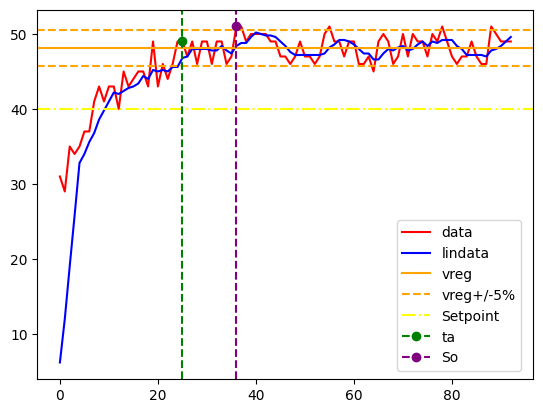

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,40,25,48.182353,8.182353,20.4559%,2.817647,5.8479%




--------------------------------------------


62.526315789473685
plota_logo.csv [60]


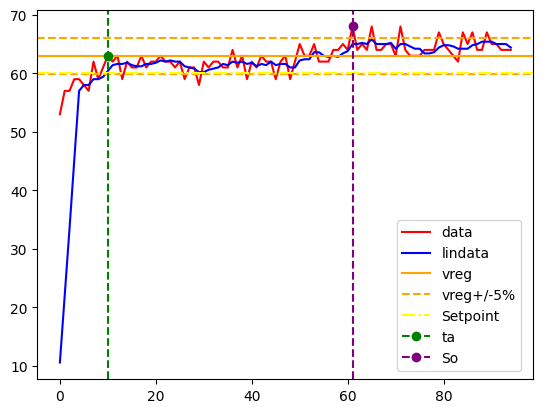

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,60,10,62.943529,2.943529,4.9059%,5.056471,8.0333%




--------------------------------------------


79.62068965517241
plota_logo.csv [80]


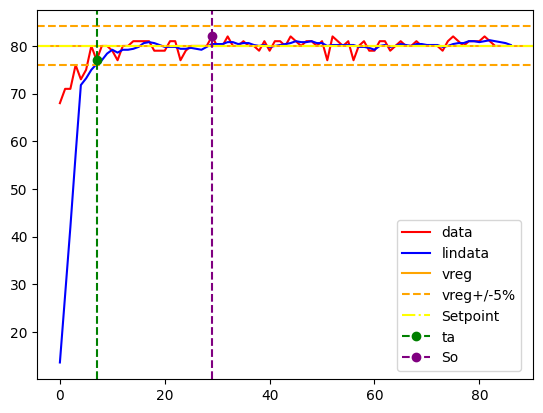

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,80,7,80.08,0.08,0.1%,1.92,2.3976%




--------------------------------------------


115.11428571428571
plota_logo.csv [117]


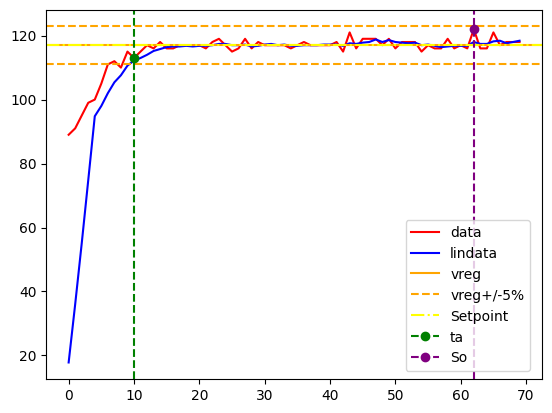

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,117,10,117.003333,0.003333,0.0028%,4.996667,4.2705%




--------------------------------------------


133.06349206349208
plota_logo.csv [134]


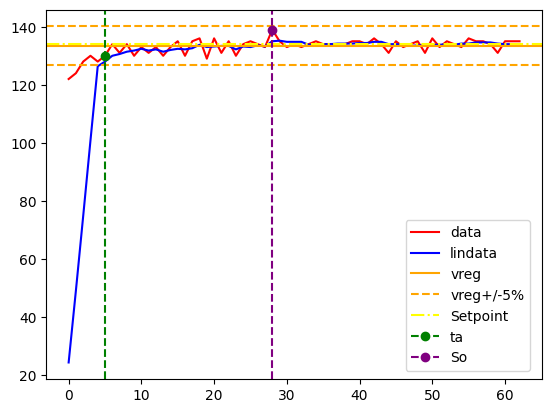

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,134,5,133.417241,-0.582759,-0.4349%,5.582759,4.1844%




--------------------------------------------


149.64814814814815
plota_logo.csv [151]


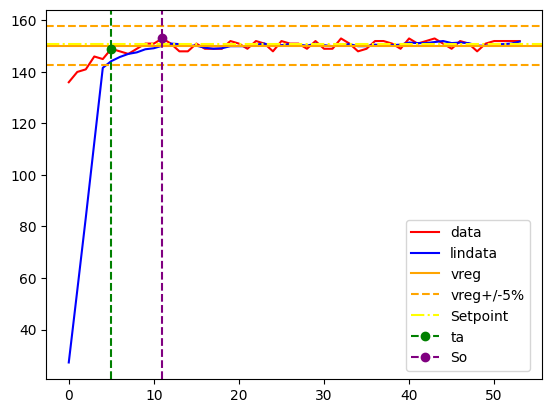

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,151,5,150.142857,-0.857143,-0.5676%,2.857143,1.9029%




--------------------------------------------


172.7377049180328
plota_logo.csv [175]


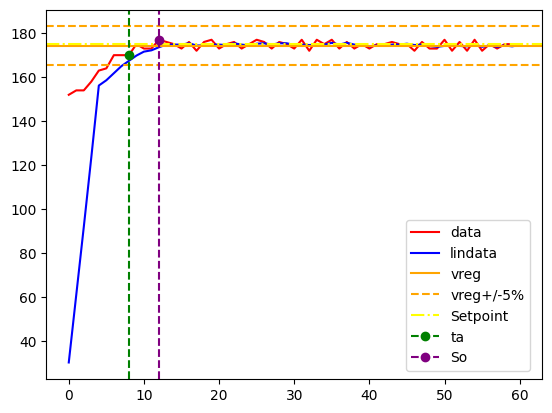

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,175,8,174.313208,-0.686792,-0.3925%,2.686792,1.5414%




--------------------------------------------


181.8181818181818
plota_logo.csv [182]


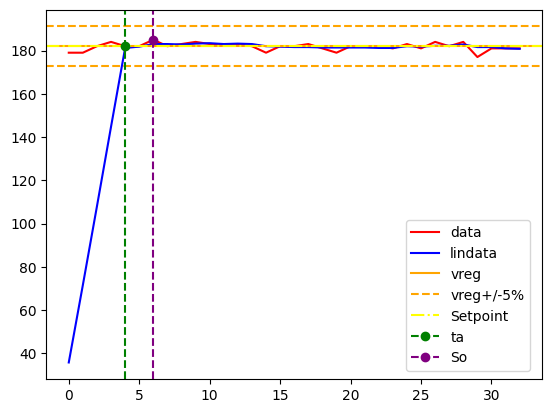

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,182,4,182.02069,0.02069,0.0114%,2.97931,1.6368%




--------------------------------------------


188.97560975609755
plota_logo.csv [189]


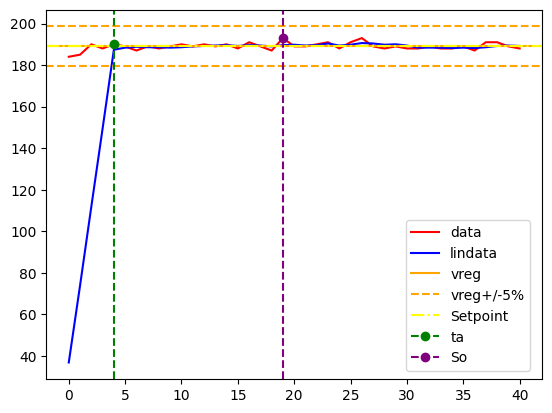

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,189,4,189.12973,0.12973,0.0686%,3.87027,2.0464%




--------------------------------------------


184.70422535211267
plota_muito_tarde.csv [200]


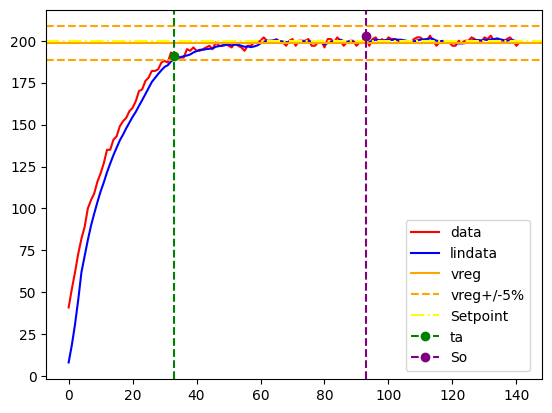

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,200,33,198.572477,-1.427523,-0.7138%,4.427523,2.2297%




--------------------------------------------


86.87394957983193
plota_nao_tao_cedo.csv [90]


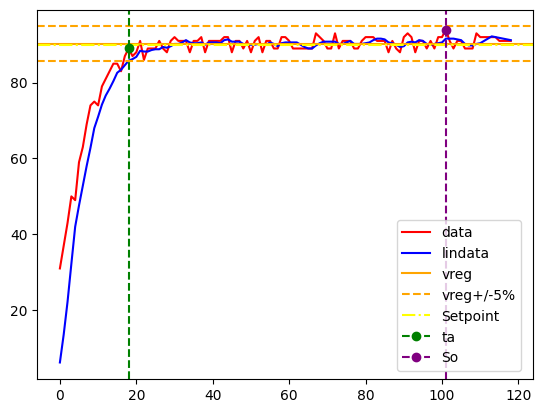

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,90,18,90.291089,0.291089,0.3234%,3.708911,4.1077%




--------------------------------------------


154.9322033898305
plota_nao_tao_cedo.csv [158]


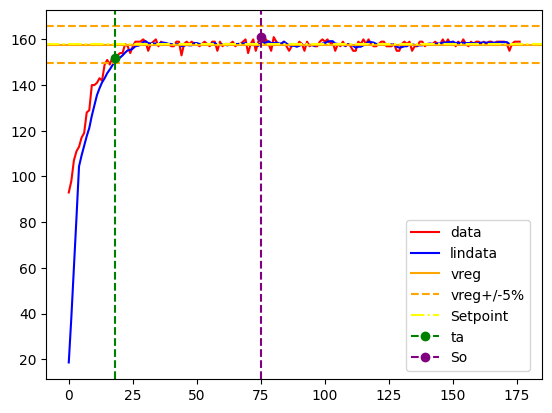

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,158,18,157.763522,-0.236478,-0.1497%,3.236478,2.0515%




--------------------------------------------


194.41975308641975
plota_nao_tao_cedo.csv [200]


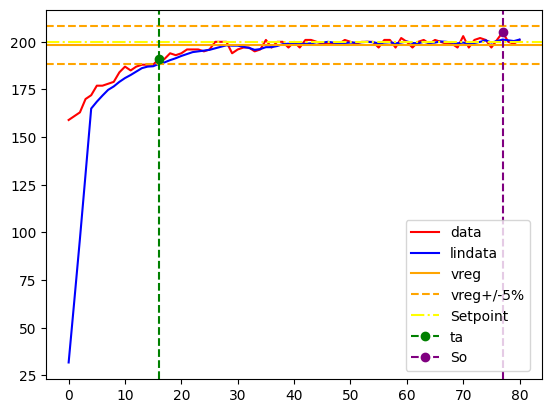

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,200,16,198.147692,-1.852308,-0.9262%,6.852308,3.4582%




--------------------------------------------


105.51515151515152
plota_nao_tao_tarde.csv [110]


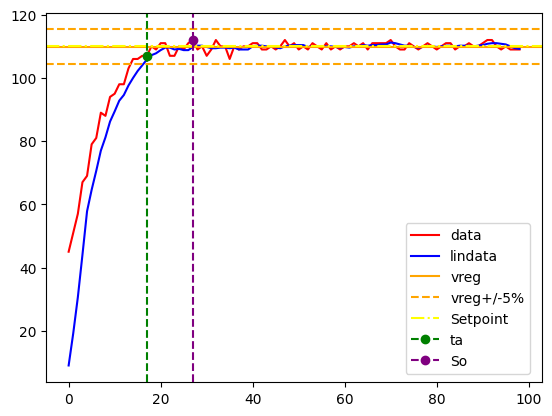

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,110,17,109.841463,-0.158537,-0.1441%,2.158537,1.9651%




--------------------------------------------


173.6326530612245
plota_nao_tao_tarde.csv [178]


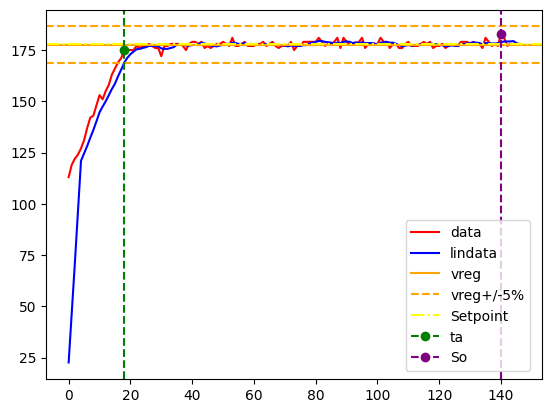

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,178,18,177.621705,-0.378295,-0.2125%,5.378295,3.0279%




--------------------------------------------




In [62]:
for name, info in di.items():
    info['ta'], info['vreg'], info['lin_data'] = get_vreg(info.get('data'), return_smoth_series=True)
    print(name)
    info.get('data').plot(color='red', label="data")

    info.get('lin_data').plot(color="blue", label="lindata")

    plt.axhline(y=info['vreg'], color='orange', label="vreg")
    plt.axhline(y=info['vreg']*1.05, color='orange', linestyle='--', label="vreg+/-5%")
    plt.axhline(y=info['vreg']*0.95, color='orange', linestyle='--')

    plt.axhline(y=info['Setpoint'], color='yellow', linestyle='-.', label="Setpoint")

    pd.Series((info.get('data')[info['ta']], ), (info['ta'], )).plot(color="green", label="ta", linestyle='--', marker='o')
    plt.axvline(x=info['ta'], color='green', linestyle='--')
    pd.Series((info.get('data').max(), ), (info.get('data').argmax(), )).plot(color="purple", label="So", linestyle='--', marker='o')
    plt.axvline(x=info.get('data').argmax(), color='purple', linestyle='--')

    plt.legend(bbox_to_anchor = (.85, 0.45), loc = 'upper center')
    plt.show()
    only_indicators_di = {
        'Setpoint': [info['Setpoint']],
        'ta': [info['ta']],
        'vreg': [info['vreg']],
        'ereg': [info['vreg']-info['Setpoint']],
        'ereg%': [str(round((100*info['vreg']/info['Setpoint'])-100, 4)) + '%'],
        'So': [info.get('data').max()-info['vreg']],
        'So%': [str(round((100*info.get('data').max()/info['vreg'])-100, 4)) + '%'],
    }
    display(pd.DataFrame(only_indicators_di))
    print("\n\n--------------------------------------------\n\n")
    # plt.show()